#  SentinelNet-AI
## AI-Powered Network Intrusion Detection System (NIDS)

---

###  **Project Statement**

The goal of this project is to develop an **AI-powered Network Intrusion Detection System (NIDS)** capable of identifying malicious network traffic and cyber-attacks in real-time.  
Using **machine learning algorithms**, the system will classify network traffic as *normal* or *malicious* based on historical data.

---

###  **Expected Outcomes**
- Understand and analyze network traffic data and common attack types  
- Apply supervised and unsupervised ML algorithms to detect intrusions  
- Perform feature engineering and anomaly detection  
- Generate alerts/logs for suspicious traffic  
- Build a final report and presentation  

---

###  **Datasets Used**

- **CICIDS2017 Dataset:** [CIC IDS 2017](https://www.unb.ca/cic/datasets/ids-2017.html)

---

###  **Milestones Implemented**
1. Dataset Acquisition and Exploration  
2. Data Cleaning and Preprocessing  
3. Feature Engineering and Selection  
4. Model Building and Training (Supervised Learning)  
5. Anomaly Detection (Unsupervised Learning)  
6. Model Evaluation and Tuning  
7. Alert Generation and Logging  
8. Documentation and Presentation

---

###  **Project Workflow**
| Week | Milestone | Description |
|------|------------|--------------|
| 1 | Project Initialization & Dataset Acquisition | Define goals, explore dataset |
| 2 | Data Cleaning & Preprocessing | Handle missing values, encoding |
| 3 | Feature Engineering & Selection | Analyze correlation, select features |
| 4 | Supervised Model Training | Build classifiers (RF, SVM, LR) |
| 5 | Anomaly Detection | Apply K-Means or Isolation Forest |
| 6 | Model Evaluation | Evaluate & fine-tune |
| 7 | Alert Generation | Simulate and log alerts |
| 8 | Documentation | Prepare final report & slides |


##  **Problem Statement**

The goal of this project is to develop **SentinelNet**, an **AI-powered Network Intrusion Detection System (NIDS)** that can automatically identify malicious network traffic and cyber-attacks in real time.  

By leveraging **machine learning algorithms**, the system will classify network traffic as **normal** or **suspicious** based on historical data.  
The model will process network traffic records, extract features, train classification models, and generate alerts when potential intrusions are detected.  



---

##  **Dataset: CICIDS2017**

### What is CICIDS2017?

The **CICIDS2017 dataset** was created by the **Canadian Institute for Cybersecurity (CIC)**.  
It contains **real-world, labeled network traffic** captured over several days, including both **benign (normal)** activities and various **attack types**

### How to Download CICIDS2017 Dataset

1. Go to the official CIC dataset website:  
   🔗 [https://www.unb.ca/cic/datasets/ids-2017.html](https://www.unb.ca/cic/datasets/ids-2017.html)

2. Scroll down to the **“Download”** section.  

3. Choose **CSV files** (they contain preprocessed flow data generated by *CICFlowMeter*).  
   > These CSV files are ready to use for ML model training — no need to process raw PCAP files.

4. Click **Download** to get all-day flow CSVs, for example:  
   - `Monday-WorkingHours.csv`  
   - `Friday-WorkingHours.csv`  




#  Milestone 1: Dataset Acquisition and Exploration

##  Advanced Exploratory Data Analysis (EDA)

**Steps:**
1. Load and inspect the dataset  
2. Get column names  
3. Check data types  
4. Generate summary info  
5. Compute basic statistics  

---

##  Handling Missing Values

**Steps:**

6. Identify missing values  
7. Visualize missing values  
8. Analyze and conclude which CSV files are required for the project


### 1. Load and inspect the dataset
- I upload a CSV file from my computer using `files.upload()`.  
- I take the uploaded file name with `list(uploaded.keys())[0]`.  
- I read the CSV into a pandas DataFrame using `pd.read_csv()`.  
- I print the file name to confirm upload.  



In [1]:
print(" Upload CSV ")

from google.colab import files
import pandas as pd
import io
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[file_name]))
df.head()


 Upload CSV 


Saving Wednesday-workingHours.pcap_ISCX.csv to Wednesday-workingHours.pcap_ISCX.csv


,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.14-209.48.71.168-49459-80-6,192.168.10.14,49459,209.48.71.168,80,6,5/7/2017 8:42,38308,1,1,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,192.168.10.3-192.168.10.17-389-49453-6,192.168.10.17,49453,192.168.10.3,389,6,5/7/2017 8:42,479,11,5,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,192.168.10.3-192.168.10.17-88-46124-6,192.168.10.17,46124,192.168.10.3,88,6,5/7/2017 8:42,1095,10,6,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,192.168.10.3-192.168.10.17-389-49454-6,192.168.10.17,49454,192.168.10.3,389,6,5/7/2017 8:42,15206,17,12,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,192.168.10.3-192.168.10.17-88-46126-6,192.168.10.17,46126,192.168.10.3,88,6,5/7/2017 8:42,1092,9,6,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


### 2. Get Column Names  

- I use `df.columns.tolist()` to list all the column names in my dataset.  
- This helps me understand what features are available for analysis.  


In [3]:
print("Column Names ")
print(df.columns.tolist())

Column Names 
['Flow ID', ' Source IP', ' Source Port', ' Destination IP', ' Destination Port', ' Protocol', ' Timestamp', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', 'FIN

### 3. Check data types  

- I use `df.dtypes` to know the type of data in each column (int, float, object).  
- This helps me decide which columns need preprocessing before training the model.  


In [4]:
print("Data Types ")
print(df.dtypes)

Data Types 
Flow ID               object
 Source IP            object
 Source Port           int64
 Destination IP       object
 Destination Port      int64
                      ...   
Idle Mean            float64
 Idle Std            float64
 Idle Max            float64
 Idle Min            float64
 Label                object
Length: 85, dtype: object


### 4.  Summary Info  

- I use `df.info()` to get a quick summary of the dataset (rows, columns, null values, and datatypes).  
- This helps me check dataset size and identify any missing or inconsistent data early.  


In [5]:
print("Basic Info ")
print(df.info())

Basic Info 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692703 entries, 0 to 692702
Data columns (total 85 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Flow ID                       692703 non-null  object 
 1    Source IP                    692703 non-null  object 
 2    Source Port                  692703 non-null  int64  
 3    Destination IP               692703 non-null  object 
 4    Destination Port             692703 non-null  int64  
 5    Protocol                     692703 non-null  int64  
 6    Timestamp                    692703 non-null  object 
 7    Flow Duration                692703 non-null  int64  
 8    Total Fwd Packets            692703 non-null  int64  
 9    Total Backward Packets       692703 non-null  int64  
 10  Total Length of Fwd Packets   692703 non-null  int64  
 11   Total Length of Bwd Packets  692703 non-null  float64
 12   Fwd Packet Length Max        69

### 5. Basic Statistics  

- I use `df.describe()` to get basic statistics like mean, min, max, and standard deviation.  
- This helps me understand the distribution and range of numerical features in the dataset.  


In [6]:
print("Basic Statistics ")
print(df.describe())

Basic Statistics 
         Source Port   Destination Port       Protocol   Flow Duration  \
count  692703.000000      692703.000000  692703.000000    6.927030e+05   
mean    42583.995907        5686.869462       9.219523    2.800168e+07   
std     19535.697710       15727.423560       5.009796    4.276680e+07   
min         0.000000           0.000000       0.000000   -1.000000e+00   
25%     36235.000000          53.000000       6.000000    2.010000e+02   
50%     49822.000000          80.000000       6.000000    6.143700e+04   
75%     56892.000000         443.000000      17.000000    8.302437e+07   
max     65535.000000       65487.000000      17.000000    1.200000e+08   

        Total Fwd Packets   Total Backward Packets  \
count       692703.000000            692703.000000   
mean             9.556261                10.214079   
std            747.197814               984.204633   
min              1.000000                 0.000000   
25%              2.000000                 1.0

### 6. Handling Missing Values

- I use `df.isnull().sum()` to see how many missing values are in each column.  


In [7]:
print(" Missing Values ")
import pandas as pd

df.isnull().sum()

 Missing Values 


,0
Flow ID,0
Source IP,0
Source Port,0
Destination IP,0
Destination Port,0
...,...
Idle Mean,0
Idle Std,0
Idle Max,0
Idle Min,0


### 7. Visualize missing values
  
- I use a heatmap to quickly visualize missing values, so I can decide how to handle them.
- Seaborn: A Python library used to create attractive and informative statistical plots like heatmaps.  
- Matplotlib: A Python library used to customize and display plots, including figure size, layout, and style.

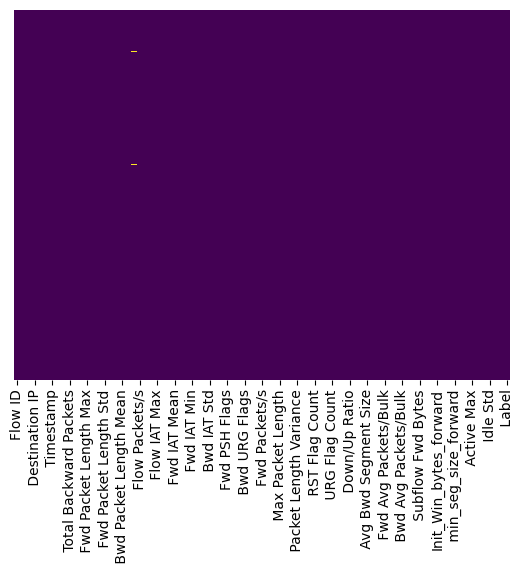

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.show()

#  Milestone 2: Advanced EDA

## Advanced Data Exploration and Preprocessing


1. Explore the dataset (shape, columns, data types, summary, statistics)  
2. Handle duplicate rows and remove irrelevant features  
3. Save the cleaned dataset  

---

## Feature Analysis and Visualization


4. Check correlation between numeric features using a heatmap  
5. Detect outliers with boxplots and without boxplot
6. Analyze important vs non-important features  
7. Apply encoding to categorical features  
8. Explore feature distribution using histograms, scatterplots, boxplots, and heatmaps  

---

## Save Processed Dataset


9. Save the final encoded dataset as CSV for model training  


### 1. Dataset Exploration
- Check dataset shape using `df.shape`.  
- List all columns with `df.columns.tolist()`.  
- Check data types using `df.dtypes`.  
- Use `df.info()` for summary of non-null values.  
- Use `df.describe()` for basic statistics of numeric features.


In [9]:

print("Dataset shape:", df.shape)
print("Columns:", df.columns.tolist())
print("Data types:\n", df.dtypes)
df.info()
df.describe()


Dataset shape: (692703, 85)
Columns: ['Flow ID', ' Source IP', ' Source Port', ' Destination IP', ' Destination Port', ' Protocol', ' Timestamp', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,692703.000000,692703.000000,692703.000000,6.927030e+05,692703.000000,692703.000000,6.927030e+05,6.927030e+05,692703.000000,692703.000000,...,692703.000000,692703.000000,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05,6.927030e+05
mean,42583.995907,5686.869462,9.219523,2.800168e+07,9.556261,10.214079,5.550930e+02,1.699644e+04,233.593936,15.022183,...,6.121279,26.761141,9.224478e+04,4.760852e+04,1.627363e+05,6.315186e+04,2.211122e+07,4.743744e+05,2.252174e+07,2.173373e+07
std,19535.697710,15727.423560,5.009796,4.276680e+07,747.197814,984.204633,6.163663e+03,2.241175e+06,603.751856,51.068835,...,715.155068,6.322368,7.007049e+05,4.742081e+05,1.094616e+06,6.051023e+05,3.812415e+07,4.488512e+06,3.848292e+07,3.807725e+07
min,0.000000,0.000000,0.000000,-1.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,-1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,36235.000000,53.000000,6.000000,2.010000e+02,2.000000,1.000000,1.200000e+01,0.000000e+00,6.000000,0.000000,...,0.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,49822.000000,80.000000,6.000000,6.143700e+04,2.000000,2.000000,8.200000e+01,1.880000e+02,46.000000,0.000000,...,1.000000,32.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,56892.000000,443.000000,17.000000,8.302437e+07,7.000000,6.000000,3.650000e+02,1.159500e+04,341.000000,32.000000,...,2.000000,32.000000,9.910000e+02,0.000000e+00,9.910000e+02,9.880000e+02,1.590000e+07,0.000000e+00,1.650000e+07,1.000000e+07
max,65535.000000,65487.000000,17.000000,1.200000e+08,203943.000000,272353.000000,1.224076e+06,6.270000e+08,24820.000000,2065.000000,...,197124.000000,60.000000,1.000000e+08,7.420000e+07,1.050000e+08,1.000000e+08,1.200000e+08,7.690000e+07,1.200000e+08,1.200000e+08


###2. Remove Duplicates
- Remove duplicate rows using `df.drop_duplicates()`.  
- Check dataset shape after removal with `df.shape`


In [10]:
import pandas as pd
import numpy as np

df = df.drop_duplicates()

#  Handle missing values
df = df.dropna()

df.replace([np.inf, -np.inf], np.nan, inplace=True)

#  Drop rows with NaN (after inf replacement)
df = df.dropna()

###  3: Save Cleaned Dataset
- Save the cleaned version of the dataset.


In [11]:

df.to_csv("cleaned_dataset.csv", index=False)
print("Cleaned dataset saved as 'cleaned_dataset.csv'")


Cleaned dataset saved as 'cleaned_dataset.csv'


###  4. Correlation Heatmap
- Select only numeric columns using `df.select_dtypes(include='number')`.  
- Use `sns.heatmap()` to visualize correlations between numeric features.  
- Helps identify highly correlated features and potential redundancy.  
- `cmap='coolwarm'` sets color scheme; `annot=False` hides correlation values.


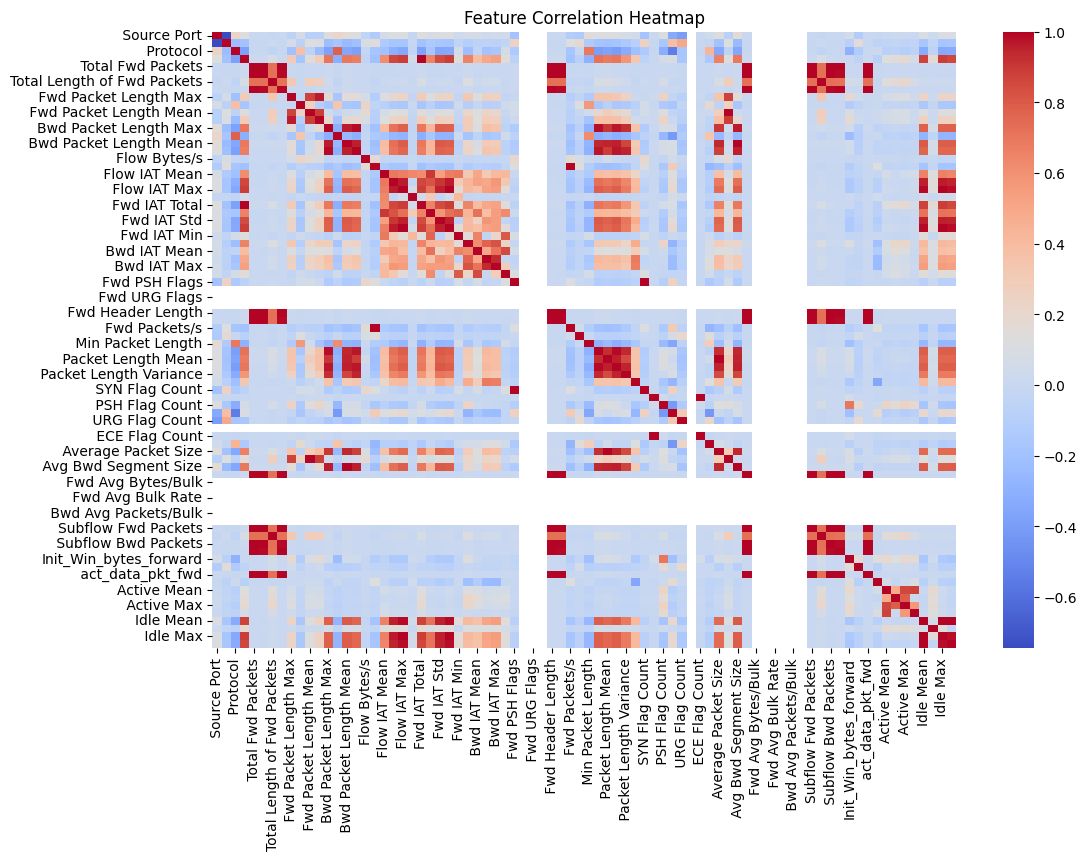

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = df.select_dtypes(include='number')

plt.figure(figsize=(12,8))
sns.heatmap(num_cols.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()


###  5.1 Outlier Detection with Boxplots
- Boxplots help visually identify extreme values in numeric features.  
- Useful to see which columns have outliers that may affect the model.


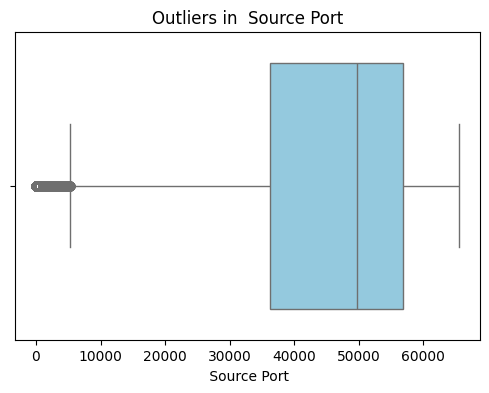

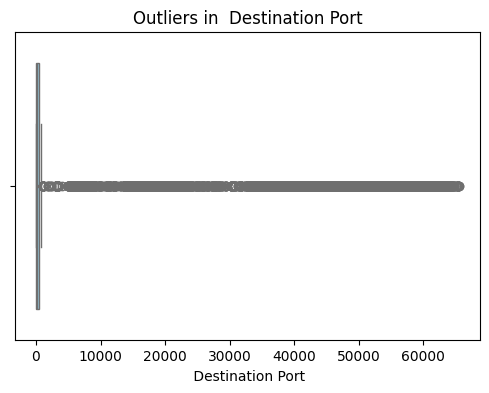

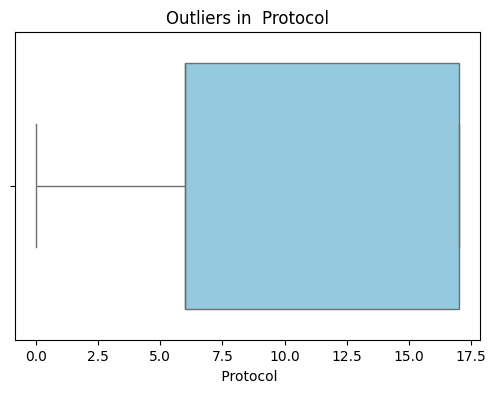

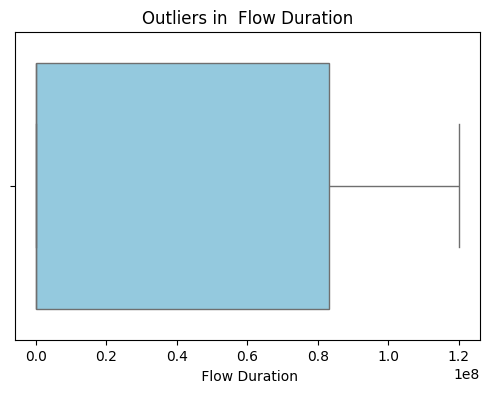

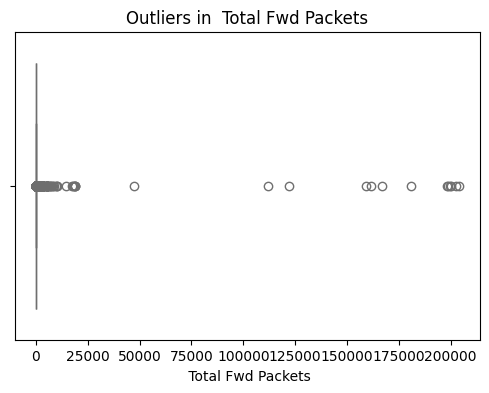

In [13]:

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

num_cols = df.select_dtypes(include=np.number).columns.tolist()

for col in num_cols[:5]:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(f"Outliers in {col}")
    plt.show()


###  5.2: Outlier Detection without Boxplots
- IQR method **mathematically identifies outliers** without plotting.  
- Prints count and percentage of outliers for each numeric feature.  



In [14]:

for col in num_cols[:5]:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)][col]

    print(f"\nColumn: {col}")
    print(f"  Total Values: {len(df[col])}")
    print(f"  Outliers Count: {len(outliers)}")
    print(f"  Outliers %: {round(100*len(outliers)/len(df[col]), 2)}%")



Column:  Source Port
  Total Values: 691390
  Outliers Count: 88709
  Outliers %: 12.83%

Column:  Destination Port
  Total Values: 691390
  Outliers Count: 81817
  Outliers %: 11.83%

Column:  Protocol
  Total Values: 691390
  Outliers Count: 0
  Outliers %: 0.0%

Column:  Flow Duration
  Total Values: 691390
  Outliers Count: 0
  Outliers %: 0.0%

Column:  Total Fwd Packets
  Total Values: 691390
  Outliers Count: 42794
  Outliers %: 6.19%


### 6. Identify Categorical & Numerical Features
- Separate numeric and categorical columns to decide preprocessing steps.   
- Categorical columns: cannot be directly used in ML models; need encoding.


In [15]:
import numpy as np

# Numeric columns
num_cols = df.select_dtypes(include='number').columns.tolist()

# Categorical columns
cat_cols = df.select_dtypes(include='object').columns.tolist()

print("Numeric Columns:", num_cols[:5], "...")
print("Categorical Columns:", cat_cols)


Numeric Columns: [' Source Port', ' Destination Port', ' Protocol', ' Flow Duration', ' Total Fwd Packets'] ...
Categorical Columns: ['Flow ID', ' Source IP', ' Destination IP', ' Timestamp', ' Label']


###  7. Encode Categorical Features
- One-hot encoding converts categorical variables into numeric form.  
- `drop_first=True` avoids the dummy variable trap.  
- Now all features are ready for machine learning models.


In [16]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

for col in cat_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])


### 8.Random Forest Feature Importance
- Random Forest automatically computes **importance scores** for all features.  
- Separate features (`X`) and target (`y`) from the encoded dataset.
- `rf.feature_importances_` gives the importance score of each feature.
- Works with numeric and one-hot encoded categorical features.  
- Top scoring features are most important for predicting the target.  
- Helps **select important features** and drop non-important ones.


Top 10 Important Features:
  Source IP                 0.163390
Flow ID                    0.120197
 Timestamp                 0.114732
 Bwd Packet Length Mean    0.061456
 Bwd Packet Length Std     0.055832
 Packet Length Std         0.044815
 Destination IP            0.036180
Bwd Packet Length Max      0.032975
 Avg Bwd Segment Size      0.030529
 Destination Port          0.025462
dtype: float64


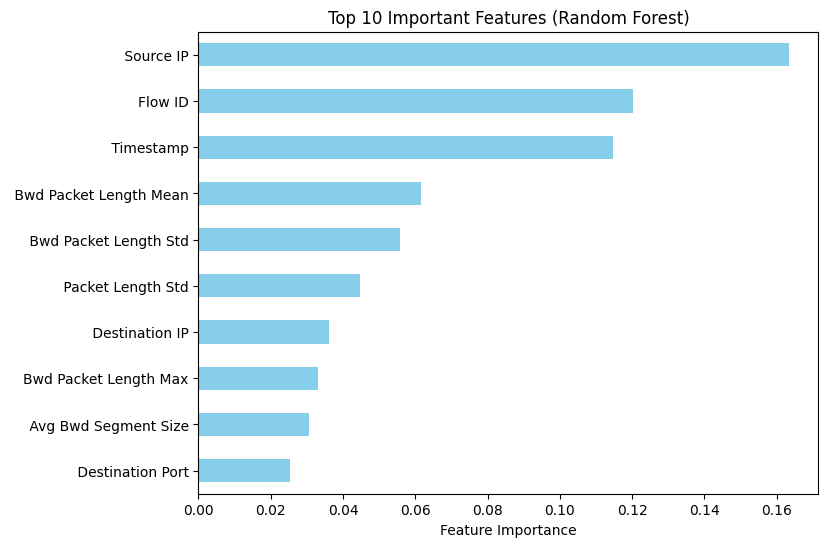

In [17]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

X = df_encoded.drop(' Label', axis=1)
y = df_encoded[' Label']

X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(X.median())

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False)[:10]
print("Top 10 Important Features:\n", top_features)

top_features.sort_values().plot(kind='barh', figsize=(8,6), color='skyblue')
plt.title("Top 10 Important Features (Random Forest)")
plt.xlabel("Feature Importance")
plt.show()


### 9.1: Histograms
- Show the distribution of numeric features.  
- Helps understand skewness, spread, and potential outliers.


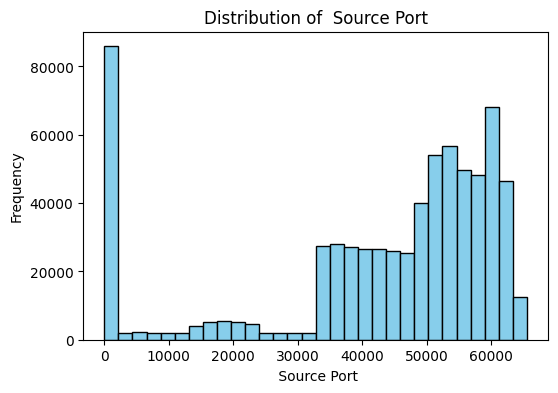

In [18]:
# Plot histograms
for col in num_cols[:1]:
    plt.figure(figsize=(6,4))
    plt.hist(df[col].dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


### 9.2: Scatterplots
- Visualizes relationship between two numeric features.  
- Can help detect correlations, clusters, or unusual patterns.


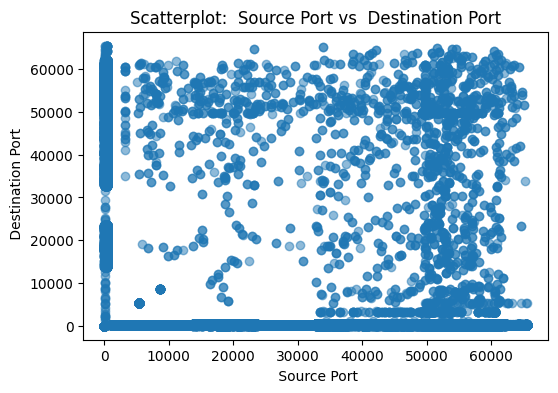

In [19]:
# Scatterplot between first two numeric features
plt.figure(figsize=(6,4))
plt.scatter(df[num_cols[0]], df[num_cols[1]], alpha=0.5)
plt.xlabel(num_cols[0])
plt.ylabel(num_cols[1])
plt.title(f"Scatterplot: {num_cols[0]} vs {num_cols[1]}")
plt.show()


### 9.3: Boxplots
- Show spread of data and highlight outliers.  
- Helps understand feature variability and detect extreme values.


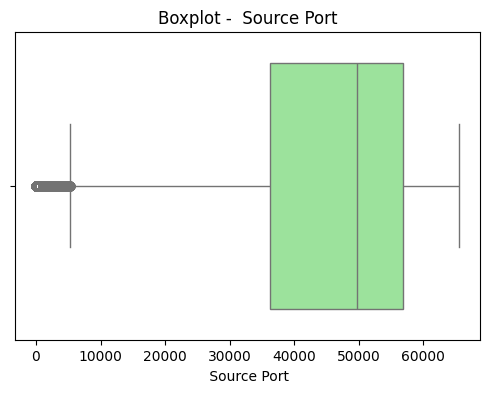

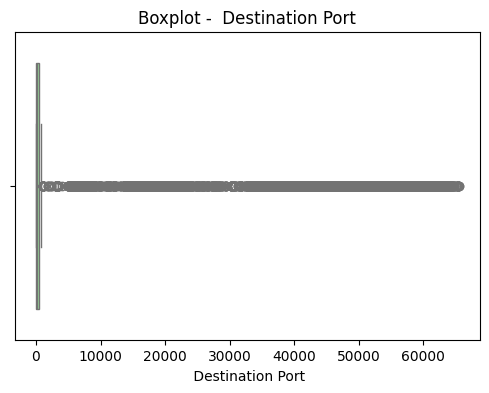

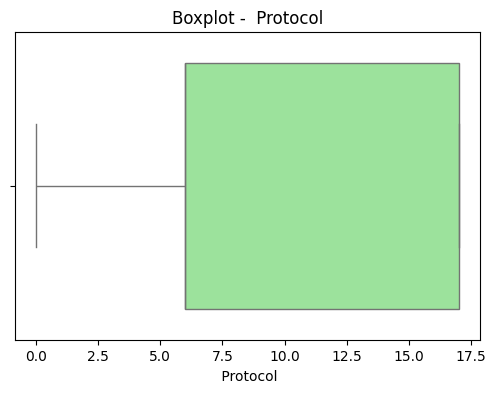

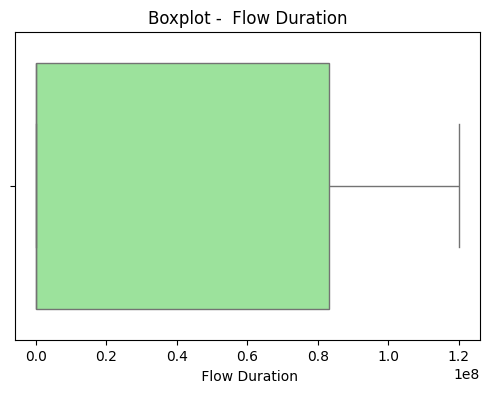

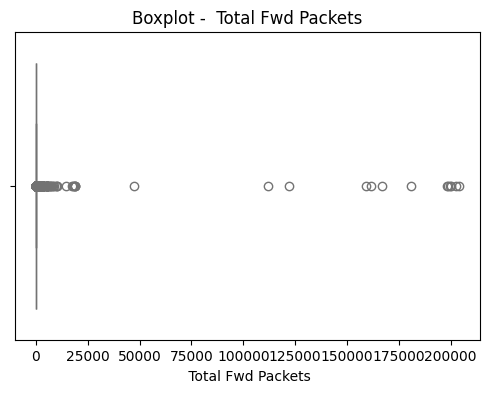

In [20]:
# Boxplots
import seaborn as sns

for col in num_cols[:5]:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col], color="lightgreen")
    plt.title(f"Boxplot - {col}")
    plt.show()


### 9.4: Heatmap
- Visualizes correlations between numeric features.  
- Useful for identifying highly correlated features that may be redundant.


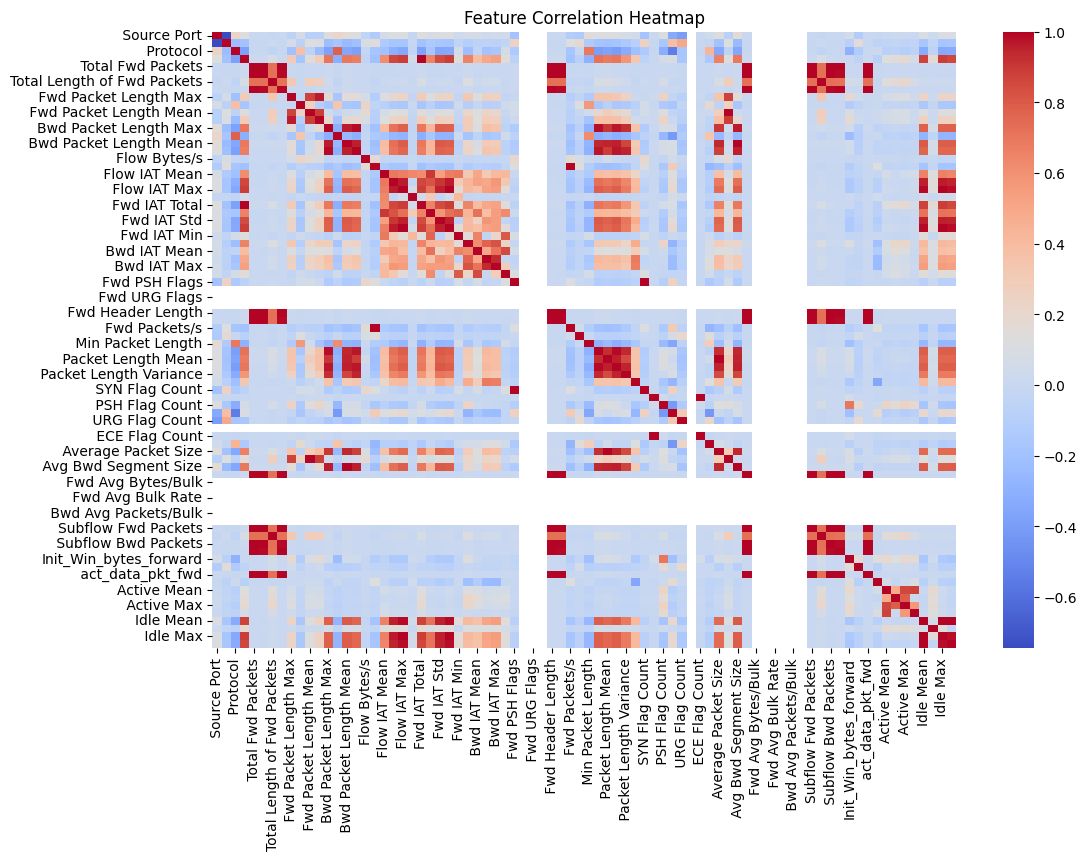

In [21]:
# Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df[num_cols].corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()


### 10. Save the Processed Dataset
- Save the fully processed and encoded dataset as a CSV file.  
- This dataset can now be directly used for model training and evaluation.  
- Ensures reproducibility and avoids repeating preprocessing steps in the future.


In [22]:

df_encoded.to_csv("processed_encoded_dataset.csv", index=False)
print("Processed and encoded dataset saved as 'processed_encoded_dataset.csv'")


Processed and encoded dataset saved as 'processed_encoded_dataset.csv'


https://github.com/SentineNet-AI-SpringBoard/SentinelNet-AI